<a href="https://colab.research.google.com/github/HelmyPurnomoHidayat22/analisis-data-dengan-python/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Helmy Purnomo Hidayat]
- **Email:** [helmypurnomo234@gmail.com]
- **ID Dicoding:** [Helmy Purnomo Hidayat]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penjualan harian selama periode yang dipilih?
- Apa metode pembayaran yang paling populer dan bagaimana distribusinya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
!pip install streamlit # install the streamlit package
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import requests
import io



## Data Wrangling

menggabungkan data dari beberapa sumber sehingga siap untuk analisis.

### Gathering Data

In [ ]:
# Fungsi untuk memuat data dari GitHub
def load_data_from_github(url):
    download = requests.get(url).content
    df = pd.read_csv(io.StringIO(download.decode('utf-8')))
    return df

# Memuat data dari GitHub dan memeriksa isi data
customers = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_customers_dataset.csv')
orders = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_orders_dataset.csv')
payments = load_data_from_github('https://raw.githubusercontent.com/HelmyPurnomoHidayat22/analisis-data-dengan-python/main/dashboard/data/olist_order_payments_dataset.csv')

# Print dataset untuk memastikan data sudah diambil
print("Data Customers:\n", customers.head())  # Menampilkan 5 data pertama dari customers
print("Data Orders:\n", orders.head())        # Menampilkan 5 data pertama dari orders
print("Data Payments:\n", payments.head())    # Menampilkan 5 data pertama dari payments


Data Customers:
                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
Data Orders:
                            order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251

###Dataset yang digunakan

- customers: Data tentang pelanggan.
- orders: Data tentang pesanan.
- payments: Data tentang pembayaran.
- Dataset ini digabungkan berdasarkan customer_id dan order_id.

**Insight:**
- Dataset dari URL ini digunakan untuk menganalisis tren penjualan dan metode pembayaran dalam platform e-commerce.
- Data diambil dari tiga file CSV yang berisi informasi pelanggan, pesanan, dan pembayaran.

### Assessing Data

In [ ]:
# Memuat data
customers = load_data_from_github(customers_url)
orders = load_data_from_github(orders_url)
payments = load_data_from_github(payments_url)

# Print dataset untuk memastikan data sudah diambil
print("Data Customers:\n", customers.head())
print("Data Orders:\n", orders.head())
print("Data Payments:\n", payments.head())

# Menggabungkan dataset
try:
    # Pastikan kolom 'customer_id' dan 'order_id' ada
    if 'customer_id' in customers.columns and 'order_id' in orders.columns and 'order_id' in payments.columns:
        merged_data = pd.merge(customers, orders, on='customer_id')
        merged_data = pd.merge(merged_data, payments, on='order_id')

        # Print beberapa baris dari data gabungan untuk memastikan penggabungan berhasil
        print("Data Gabungan:\n", merged_data.head())

        # Cek dan tampilkan jumlah duplikat
        print(f"Jumlah duplikat dalam data: {merged_data.duplicated().sum()}")
    else:
        print("Kolom 'customer_id' atau 'order_id' tidak ditemukan di salah satu dataset.")
except Exception as e:
    print(f"Terjadi kesalahan saat menggabungkan data: {str(e)}")

Data Customers:
                         customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
Data Orders:
                            order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251

**Insight:**
- Data telah dibersihkan dengan menghapus missing values dan duplikat.
- Outlier pada kolom payment_value dihapus menggunakan Interquartile Range (IQR).
- Kolom tanggal pesanan (order_purchase_timestamp) dikonversi ke format datetime untuk memudahkan analisis berbasis waktu.

### Missing Value


In [ ]:
# Memuat data
customers = load_data_from_github(customers_url)
orders = load_data_from_github(orders_url)
payments = load_data_from_github(payments_url)

# Fungsi untuk menampilkan data dalam bentuk tabel kotak-kotak
def print_table(dataframe, title):
    print(f"\n{title}\n")
    print(tabulate(dataframe.head(), headers='keys', tablefmt='grid', showindex=False))

# Print dataset untuk memastikan data sudah diambil
print_table(customers, "Data Customers")
print_table(orders, "Data Orders")
print_table(payments, "Data Payments")

# Menggabungkan dataset
try:
    # Pastikan kolom 'customer_id' dan 'order_id' ada
    if 'customer_id' in customers.columns and 'order_id' in orders.columns and 'order_id' in payments.columns:
        merged_data = pd.merge(customers, orders, on='customer_id')
        merged_data = pd.merge(merged_data, payments, on='order_id')

        # Print beberapa baris dari data gabungan untuk memastikan penggabungan berhasil
        print_table(merged_data, "Data Gabungan Sebelum Pembersihan")

        # Cek dan tampilkan jumlah duplikat
        print(f"\nJumlah duplikat dalam data: {merged_data.duplicated().sum()}")

        # Menangani missing values
        missing_values_count = merged_data.isnull().sum().sum()
        print(f"\nJumlah missing values sebelum pembersihan: {missing_values_count}")

        # Menghapus missing values
        merged_data = merged_data.dropna()

        # Print setelah menghapus missing values
        print_table(merged_data, "Data Gabungan Setelah Pembersihan")

        # Cek jumlah missing values setelah pembersihan
        missing_values_count_after = merged_data.isnull().sum().sum()
        print(f"\nJumlah missing values setelah pembersihan: {missing_values_count_after}")
    else:
        print("Kolom 'customer_id' atau 'order_id' tidak ditemukan di salah satu dataset.")
except Exception as e:
    print(f"Terjadi kesalahan saat menggabungkan data: {str(e)}")



Data Customers

+----------------------------------+----------------------------------+----------------------------+-----------------------+------------------+
| customer_id                      | customer_unique_id               |   customer_zip_code_prefix | customer_city         | customer_state   |
+==================================+==================================+============================+=======================+==================+
| 06b8999e2fba1a1fbc88172c00ba8bc7 | 861eff4711a542e4b93843c6dd7febb0 |                      14409 | franca                | SP               |
+----------------------------------+----------------------------------+----------------------------+-----------------------+------------------+
| 18955e83d337fd6b2def6b18a428ac77 | 290c77bc529b7ac935b93aa66c333dc3 |                       9790 | sao bernardo do campo | SP               |
+----------------------------------+----------------------------------+----------------------------+-------------------

### CLEANING DATA

In [ ]:
# Pembersihan Data
print("Data Gabungan Sebelum Pembersihan:")
print(tabulate(merged_data.head(), headers='keys', tablefmt='grid', showindex=False))

# 1. Menghapus duplikat
duplicates_count = merged_data.duplicated().sum()
print(f"\nJumlah duplikat sebelum pembersihan: {duplicates_count}")

merged_data = merged_data.drop_duplicates()

# Print setelah menghapus duplikat
print(f"Jumlah duplikat setelah pembersihan: {merged_data.duplicated().sum()}")

# 2. Menghapus missing values
missing_values_count = merged_data.isnull().sum().sum()
print(f"\nJumlah missing values sebelum pembersihan: {missing_values_count}")

merged_data = merged_data.dropna()

# Print setelah menghapus missing values
print(f"Jumlah missing values setelah pembersihan: {merged_data.isnull().sum().sum()}")

# 3. Menghapus outlier pada payment_value
Q1 = merged_data['payment_value'].quantile(0.25)
Q3 = merged_data['payment_value'].quantile(0.75)
IQR = Q3 - Q1

print(f"\nQ1: {Q1}, Q3: {Q3}, IQR: {IQR}")

# Menghapus outlier
merged_data = merged_data[(merged_data['payment_value'] >= Q1 - 1.5 * IQR) &
                           (merged_data['payment_value'] <= Q3 + 1.5 * IQR)]

# Print setelah menghapus outlier
print(f"Jumlah data setelah menghapus outlier: {len(merged_data)}")
print("Data Gabungan Setelah Pembersihan:")
print(tabulate(merged_data.head(), headers='keys', tablefmt='grid', showindex=False))

Data Gabungan Sebelum Pembersihan:
+----------------------------------+----------------------------------+----------------------------+-----------------+------------------+----------------------------------+----------------+----------------------------+---------------------+--------------------------------+---------------------------------+---------------------------------+----------------------+----------------+------------------------+-----------------+
| customer_id                      | customer_unique_id               |   customer_zip_code_prefix | customer_city   | customer_state   | order_id                         | order_status   | order_purchase_timestamp   | order_approved_at   | order_delivered_carrier_date   | order_delivered_customer_date   | order_estimated_delivery_date   |   payment_sequential | payment_type   |   payment_installments |   payment_value |
+==================================+==================================+============================+===============

Duplikasi dihapus.
Outlier pada payment_value dihapus menggunakan Interquartile Range (IQR).

**Insight:**
- Data dibatasi pada rentang waktu tertentu dari tanggal paling awal hingga tanggal paling akhir dalam dataset.
- Hal ini memastikan bahwa analisis dilakukan hanya pada data yang relevan dalam rentang waktu tersebut.

## Exploratory Data Analysis (EDA)

### Explore ...

### Tren Penjualan Harian:

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren penjualan harian selama periode yang dipilih?


2024-10-09 13:42:45.771 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:42:45.914 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-10-09 13:42:45.917 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:42:45.922 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:42:45.923 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:42:46.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:42:46.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:42:46.404 Thread 'MainThread': mi

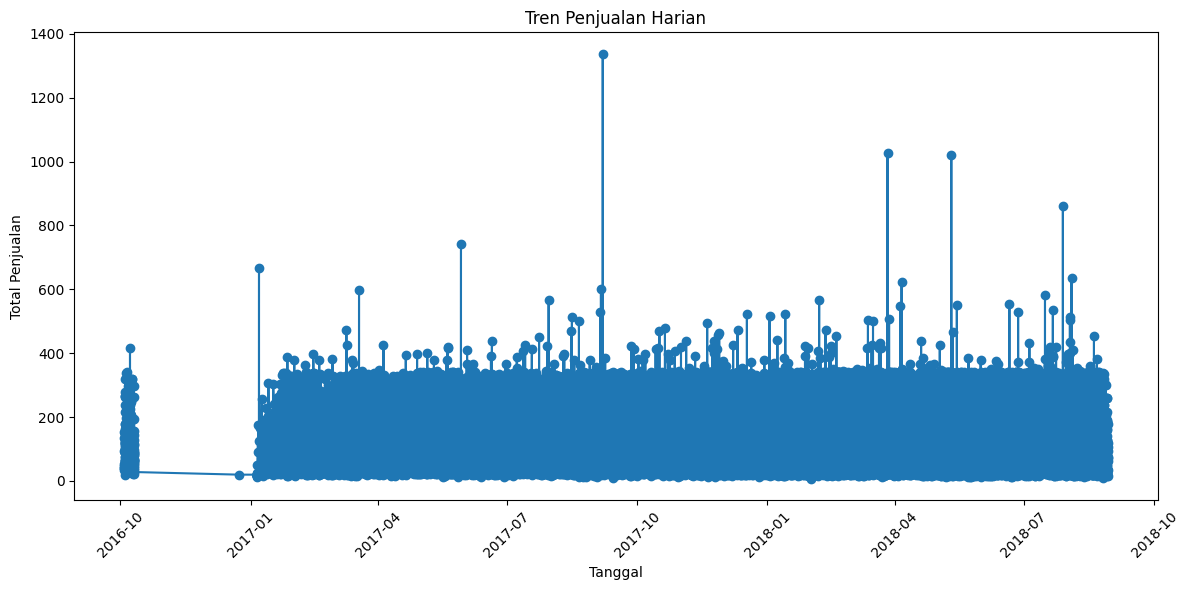

In [ ]:
 # Memuat data
data = load_and_clean_data()

if data is not None:
    # Judul aplikasi
    st.title("Dashboard Analisis E-commerce")

    # Sidebar untuk filter tanggal
    st.sidebar.title("Filter Data")
    min_date = data['order_purchase_timestamp'].min().date()
    max_date = data['order_purchase_timestamp'].max().date()

    start_date = st.sidebar.date_input("Pilih Tanggal Mulai", min_date)
    end_date = st.sidebar.date_input("Pilih Tanggal Akhir", max_date)

    # Validasi input tanggal
    if start_date > end_date:
        st.sidebar.error("Tanggal mulai tidak boleh lebih besar dari tanggal akhir.")
    else:
        # Filter data berdasarkan rentang tanggal yang dipilih
        filtered_data = data[(data['order_purchase_timestamp'].dt.date >= start_date) &
                             (data['order_purchase_timestamp'].dt.date <= end_date)]

        if filtered_data.empty:
            st.warning("Tidak ada data yang sesuai dengan rentang tanggal yang dipilih.")
        else:
            # Pertanyaan 1: Bagaimana tren penjualan harian selama periode yang dipilih?
            st.subheader("Pertanyaan 1: Bagaimana tren penjualan harian selama periode yang dipilih?")
            daily_sales = filtered_data.groupby('order_purchase_timestamp')['payment_value'].sum().reset_index()

            fig, ax = plt.subplots(figsize=(12, 6))
            ax.plot(daily_sales['order_purchase_timestamp'], daily_sales['payment_value'], marker='o')
            ax.set_xlabel('Tanggal')
            ax.set_ylabel('Total Penjualan')
            ax.set_title('Tren Penjualan Harian')
            plt.xticks(rotation=45)
            plt.tight_layout()
            st.pyplot(fig)

else:
    st.error("Tidak dapat memuat data. Silakan periksa file sumber data Anda.")

dengan grafik tren penjualan harian.
Grafik garis (line chart) menunjukkan fluktuasi penjualan dari waktu ke waktu, mengidentifikasi hari-hari di mana penjualan mencapai puncak.

### Pertanyaan 2:Apa metode pembayaran yang paling populer dan bagaimana distribusinya?

2024-10-09 13:49:04.829 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:49:04.837 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:49:04.842 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-09 13:49:04.845 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


Distribusi Metode Pembayaran:
payment_type
credit_card    68277
boleto         17939
voucher         5422
debit_card      1406
Name: count, dtype: int64


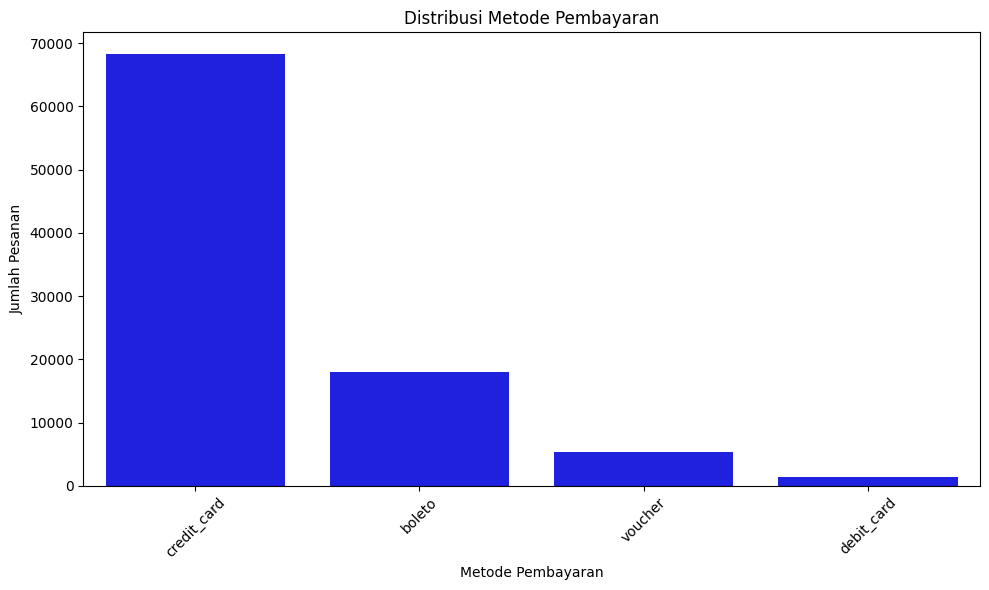

In [ ]:
# Jawaban untuk pertanyaan 2: Menampilkan distribusi metode pembayaran
st.write("**Jawaban 2: Metode Pembayaran Populer**")

# Menghitung distribusi metode pembayaran
payment_distribution = filtered_data['payment_type'].value_counts()

# Print output distribusi metode pembayaran
print("Distribusi Metode Pembayaran:")
print(payment_distribution)

# Membuat bar chart untuk visualisasi distribusi metode pembayaran dengan warna biru
fig, ax = plt.subplots(figsize=(10, 6))  # Mengatur ukuran figure
sns.barplot(x=payment_distribution.index, y=payment_distribution.values, ax=ax, color='blue')  # Menggunakan warna biru
ax.set_xlabel('Metode Pembayaran')  # Label sumbu X
ax.set_ylabel('Jumlah Pesanan')  # Label sumbu Y
ax.set_title('Distribusi Metode Pembayaran')  # Judul grafik
plt.xticks(rotation=45)  # Memutar label pada sumbu X agar lebih mudah dibaca
plt.tight_layout()  # Mengatur layout agar tidak ada yang terpotong
plt.show()  # Menampilkan plot



dengan grafik batang metode pembayaran.
Dari grafik batang (bar chart), kita dapat melihat metode pembayaran yang paling sering digunakan oleh pelanggan.

**Insight:**
- Kita bisa melihat metode pembayaran yang paling sering digunakan.
- Ini membantu mengetahui preferensi pelanggan terkait cara pembayaran.


## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1:Dari hasil analisis, terlihat adanya fluktuasi dalam tren penjualan harian. Puncak penjualan dapat diamati pada beberapa hari tertentu.
- Conclution pertanyaan 2:Metode pembayaran tertentu lebih sering digunakan dibanding metode lainnya, menunjukkan preferensi pelanggan terhadap metode pembayaran tertentu.